In [ ]:
import pandas as pd

""" 
RSA Analsysis
Here, all things related to extraction of RSA.

Older notes:
- Here: Extraction of PopAnal for each (bregion, twind) [and other conjunctions if needed]. i.e,, 
to go from snippets to "populatoin_level" specific snippets.

- TO MAKE PLOTS, which combined all the above, go to 231203_snippets_rsa_PLOTS.ipynb
"""

In [ ]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

## Analysis using scalar vectors (i.e, dims are sites), e.g., RSA, decode, etc.

##### Preprocess

##### Plans

In [ ]:
# DEfitions:
# action = specific conjunction of conditions (e..g, shape x location x index)

# (1) Is an area active for a given action? Simply, is activity different from 0.
# 1) Modulation, i.e., actiivty in high D space (i.e., euclidian distnace from 0) --> this is a single scalar that can ask if correlate with variables (e.g., stroke index)
# --> is modulated by actions (i.e., for each action, get a single scalar).
# Also: Visualize each area using PCA (i.e., just like I do with rasters, but use top N dimensions instead of N units).
# - get PCs using trial data? Or one for each condition.

# (2) How different is activity for each action, in a given area? Simply, are actions not just diff from 0, but different from each other
# 1b) Decode each action
# --> Simply, can classify.

# (2b) Does area encode speicifc parameters?
# - linear model: (fr vector) --> category, etc. (as before).
# - classifier (like above, but for abstract params).
# --- COMPOSITIONALITY: cross-condition classifier [willet didnt do]

# (3) RSA (correlation/similarity structure). Simply, are features for a given variable similar across other variables?
# - See notes below.

# (4) Subspaces: identify using dPCA (or manual version of that).
# - Use dPCA to identify diemsions. Can then ask how activity in each dimension changes or is affected by manipualtions (e.g., partial cueing). 
# - https://github.com/machenslab/dPCA


##### TODO

In [ ]:
## TODO (1) Modulation
# not done.

In [ ]:
## TODO -- effect sizes

# See in progress in 231203_snippets_rsa_PLOTS
# Direction of effect --> preSMA higher FR during middle strokes?


In [ ]:
## TODO (1/6/24) -- RSA
# clean up (do later):
# - verify that normalization process is good.
# - time warping.

## PREPROCESS
# for each channel, subtract mean (e.g., split day into quartiles)

# - Compare plan window to during strokes.
# -- compare plan yo strokes. in general do directed test fewvar 

# - for regression version, note that should rescale coeff for ordinal vs categorical. maybe also plot r2. 

# - include mult time slices. then do pca with datapt being trials on the entire concated slices.
# Instead of a single time slice, take multiple and reshape into a vector.
# - e.g.,, Willet 2021 did this for comparing S-T patterns across characters

# - how get done signal? have a variable for last stroke. 

## UPdates to analysis next time:
# - More sliding windows (overlapping)
# - Remove bleedthru in smoothed fr.
# - Euclidian distance? deals with cases where vector norms are small and the corr is noisy?
# - distance matrix, compute in unbiased manner.
# - if using multiple regression, then first take z-score of data (Flesch).
# - Time warping?
# - Use trial-level data?

# alternative to RSA: within each level of othervar, get pairwise vectors betwene all levsl of var. are these similar across levels of othervar? This inherently subtracts mean of each level of othervar, but not good; (i) requires at least 2 levels of var, consistent acorss othervar, and (ii) might be noisier.

# Use colinearity of theoretical matrices (between two vars) as a lower bound on how different they can be?

### ANALYSIS KINDS:
# TWO kinds of analysses (orthogonal)
# 1. do a single that combines each window, here looking for variables rekated to strokes such as onset offset. 
# 2. The obvious one. -- Including non-stroke touching events? e.g., have var for touching screen and include button touching data. ie other events where touch?
# -- 2a Balanced, if possible, between each pair of stim that have such balance. Do this for all pairs, then collect data.
# - norm by subtract other (this is only possible if have all these conjunctions).  (Willet Cell 2020).
# - For each expt, there are variables designed to be separated.
# -- 2b Combined analyses over all
# - DO NOT norm by subtraction. This leads to weird biases unless you are balanced.
# - remove levels that are present only in one case of other level.

## Dimenstionality reduction (i.e,, to find vector representation for each area)
# Method: use multiple subwindows... (i.e., 300ms, and two sub-windows)
# Method: dPCA for each variable?

## Cleaning up conjunctions/balancing of data
# How deal with problem with, for a given var, effects differ across levels? E.g., all driven by one shape within shapes?
# - Penalize for high var acorss levels? Take the worst score across levels?
# Consider comparisons only acors scases with different other var?
# - plot maasking heatplot... for pount above.
# Method: subtract out othervar? No, can only do this for cases focusing on specific var. Mixed effects model, where random effect for each level of othervar? And fixed effects for each var. NO becase this 
# assumes factorization. 
# - weight correlation (between dist matrices) by n trials in each cell? e..g, sqrt(n).

## Variables to add
# - antoher theoretical one, which is using all variables at once (see Flesch).


##### Extract all the variables you will care about

In [ ]:
##### Plot distributions of gap angles vs. categorical LOCATION next, etc. --> dissocaited.

xvar = "gap_to_next_angle"
xvar = "gap_to_next_dist"
sns.displot(data=DS.Dat, x=xvar, col=si, hue=f"{xvar}_binned")


for si in ["stroke_index", "stroke_index_fromlast"]:
    sns.displot(data=DS.Dat, x="gap_to_next_angle", y="gap_to_next_dist", col=si, hue="gap_from_prev_angle_binned")
    sns.displot(data=DS.Dat, x="gap_from_prev_angle", y="gap_from_prev_dist", col=si, hue="gap_from_prev_angle_binned")


### DEVO

In [ ]:
DATE = 230126
animal = "Pancho"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="kilosort_if_exists") 


In [ ]:
MS.SessionsList

In [ ]:
# CHARS
# - extract DS.
sn = MS.SessionsList[0]

D = sn.Datasetbeh

In [ ]:
# Look at whats in D
D.Dat["epoch"].value_counts()

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(D.Dat, ["epoch", "seqc_0_shape", "seqc_0_loc"])

In [ ]:

# - load pre-saved DS from cluster analysis, and merge
from neuralmonkey.classes.snippets import datasetstrokes_extract
tasks_only_keep_these = ["character"]
DS = datasetstrokes_extract(D, "clean_chars", False, None) 

# RUN (Main goal: extract PA for each (brain, twindow) without doing much else

In [ ]:
# from neuralmonkey.analyses.state_space_good import pipeline_rsa_scalar_population_MULT, load_mult_data_helper, pipeline_rsa_scalar_population_MULT_PLOTS, load_single_data
from neuralmonkey.analyses.rsa import pipeline_rsa_scalar_population_MULT, load_mult_data_helper, pipeline_rsa_scalar_population_MULT_PLOTS, _load_single_data


##### Option 1: Extract Snippets --> Extract Popanals

In [ ]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper
# from neuralmonkey.analyses.state_space_good import rsa_convert_PA_to_Cl, _preprocess_rsa_scalar_population, pipeline_rsa_scalar_population
from neuralmonkey.analyses.rsa import rsa_convert_PA_to_Cl, pipeline_rsa_all_steps

if True:
    ### PIG
    list_animal_date = [
            ("Diego", "230628"),
            ("Diego", "230630"),
            ("Pancho", "230623"),
            ("Pancho", "230626"),
            ]
    list_version_distance = ["pearson", "euclidian"]
    SAVEDIR = "/gorilla1/analyses/recordings/main/RSA"
    list_time_windows = [
        (-0.5, -0.3),
        (-0.3, -0.1),
        (-0.1, 0.1),
        (0.1, 0.3),
        (0.3, 0.5)
        ]
    list_which_level = ["stroke", "stroke_off"]
    DS_pruned = None
    SKIP_SESS_EXTRACTION = False
    
    FEATURES_EXTRACT_TO_POPANAL = []
else:
    ### CHAR
    # This is very hacky. Currently extracting DS by hand above, and then bypassing its extradction
    # belopw. SHould incorporate this input a method of DS...
    
    assert animal=="Pancho"
    assert DATE == 230126
    list_animal_date = [
            (animal, DATE),
            ]
    list_version_distance = ["pearson"]
    SAVEDIR = "/gorilla1/analyses/recordings/main/RSA"
    list_time_windows = [
        (-0.5, -0.3),
        (-0.3, -0.1),
        (-0.1, 0.1),
        (0.1, 0.3),
        (0.3, 0.5)
        ]
    list_which_level = ["stroke", "stroke_off"]
    DS_pruned = DS # This is extracted manually above (very interim)
    SKIP_SESS_EXTRACTION = True
    
    FEATURES_EXTRACT_TO_POPANAL = ['clust_sim_max', 'shape_label', 'velmean_th', 'velmean_thbin', 'Stroke']
    
    
for animal, DATE in list_animal_date:
    # DATE = 230623
    # animal = "Pancho"
    # DATE = 230630
    # animal = "Diego"
    
    if not SKIP_SESS_EXTRACTION:
        MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="kilosort_if_exists") 
        # MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt") 
        
        ### Snippets, split by stroke index and location
        
        # Pick out a single session
        sn = MS.SessionsList[0]
    
    for PLOT_INDIV in [False]:
        for which_level in list_which_level:
        # for which_level in ["stroke_off"]:
            # == MODIFY THESE:
            list_pre_dur = [-0.525]
            list_post_dur = [0.525]
            # which_level = "stroke_off"
            # which_level = "stroke"
            
            # == IGNORE THESE:
            strokes_only_keep_single = False # if True, then prunes dataset, removing trials "remove_if_multiple_behstrokes_per_taskstroke"
            prune_feature_levels_min_n_trials = 1 
            list_events = [] # must be empty
            list_features_extraction = []
            list_features_get_conjunction = []
            trials_prune_just_those_including_events=False
            
            SP = Snippets(sn,
                which_level,
                list_events,
                list_features_extraction,
                list_features_get_conjunction,
                list_pre_dur,
                list_post_dur,
                strokes_only_keep_single=strokes_only_keep_single,
                tasks_only_keep_these=None,
                prune_feature_levels_min_n_trials=prune_feature_levels_min_n_trials,
                dataset_pruned_for_trial_analysis=None,
                trials_prune_just_those_including_events=trials_prune_just_those_including_events,
                fr_which_version='sqrt',
                NEW_VERSION=True,
                SKIP_DATA_EXTRACTION=False,
                DS_pruned=DS_pruned
                         )
            
            ####### EXTRACT REQUIRED FEATURES
            # for version_distance in ["pearson", "euclidian"]:
            for version_distance in list_version_distance:
                
                # Extract and save PopAnals.
                DictBregionTwindPA = snippets_extract_popanals_split_bregion_twind(SP, list_time_windows, EFFECT_VARS)
                

            

##### Option 2: Load pre-saved Snippets --> Extract PopAnal

In [ ]:
from neuralmonkey.classes.session import load_mult_session_helper


In [ ]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets

DATE = 220718
animal = "Pancho"
which_level = "substroke"
DEBUG = False
MS = load_mult_session_helper(DATE, animal, spikes_version="tdt")
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level,
    DEBUG=DEBUG)


In [ ]:
SP.DfScalar = SP.datamod_compute_fr_scalar(SP.DfScalar)

In [ ]:
sum(np.asarray(list(map_site_to_fr.values()))>1.5)

In [ ]:
SP.prune_low_firing_rate_sites()

In [ ]:
min(map_site_to_fr.values())

In [ ]:
map_site_to_fr

In [ ]:
map_site_to_fr[328]

In [ ]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
DictParamsEachQuestion = rsagood_questions_dict(animal, DATE)


question = "CV_shape"
# question = "SP_shape_loc"
q_params = DictParamsEachQuestion[question]
print(q_params)

In [ ]:
list_time_windows = [
    (-0.3, -0.1),
    (0.1, 0.3),
    ]
b
from python

In [ ]:
# Testing out params (ANOVA).
from neuralmonkey.analyses.state_space_good import snippets_extract_popanals_split_bregion_twind
from neuralmonkey.metadat.analy.anova_params import params_getter_dataset_preprocess

params_getter_dataset_preprocess("singleprimvar", "Pancho", 230612)

In [ ]:
# Clean up SP and extract features
D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=q_params["ANALY_VER"], vars_extract_append=q_params["effect_vars"])

In [ ]:

# Prune to just the events of interest
if q_params["events_keep"] is not None:
    events_in = SP.DfScalar["event"].unique().tolist()
    SP.DfScalar = SP.DfScalar[SP.DfScalar["event"].isin(q_params["events_keep"])].reset_index(drop=True)
    if len(SP.DfScalar)==0:
        print(q_params["events_keep"])
        print(events_in)
        assert False

# Sanity check
# - variables are present
# pa = dfallpa["pa"].values[0]
# for var in q_params["effect_vars"]:
#     assert var in SP.DfScalar.columns
    # assert var in pa.Xlabels["trials"].columns
# events_exist = pa.Xlabels["trials"]["eventdistStrokWrapperMult with preprocess"].tolist()
# assert any([ev in events_exist for ev in q_params["events_keep"]])

HACK_RENAME_SHAPES = True

# Extract all popanals
dfallpa = snippets_extract_popanals_split_bregion_twind(SP, list_time_windows,
                                                list_features_extraction,
                                                HACK_RENAME_SHAPES=HACK_RENAME_SHAPES)


In [ ]:
pa = dfallpa["pa"].values[0]
id(pa.Xlabels["trials"])

In [ ]:
dfthis = pa.Xlabels["trials"]
# dfthis = pa.Xlabels["trials"].copy()
dfthis["twind"] = [(-0.3, -0.1) for _ in range(len(dfthis))]
pa.Xlabels["trials"] = dfthis

In [ ]:
dfallpa

In [ ]:
pa.Xlabels["times"]

In [ ]:
pa = dfallpa["pa"].values[1]
id(pa.Xlabels["trials"])

In [ ]:
# make copy whenver generate new pa
# pa must deepcopy.
pa = dfallpa["pa"].values[0]
pa.Xlabels["trials"]["twind"] = [(0,0) for _ in range(len(pa.Xlabels["trials"]))]

In [ ]:
len(set(dfallpa["pa"]))

In [ ]:
[pa.Xlabels["trials"] for pa in dfallpa["pa"]]

In [ ]:
for i, row in dfallpa.iterrows():
    print(row["twind"], row["pa"].Xlabels["trials"]["twind"].unique())

## Load and Test code with a single specific dataset

##### [Option 1] Generate dfallpa by running above (from Snippets)

##### [Option 2] Load pre-computed DFallpa

In [1]:
from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_wrapper_loadresults, rsagood_pa_vs_theor_single

# /gorilla1/analyses/recordings/main/RSA/Diego-230619/agg_True-subtr_gridsize-dist_euclidian_unbiased/SP_shape_size/process_single_pa/trial-03_samp-M1_m-(-0.5, -0.3)


# animal = "Pancho"
# date = 220716
# question = "SP_shape_size"
# version_distance = "euclidian_unbiased"
# subtract_mean_each_level_of_var = None

# animal = "Pancho"
# date = 220715
# question = "SP_shape_loc_TIME"
# version_distance = "euclidian_unbiased"
# subtract_mean_each_level_of_var = "event"

# animal = "Pancho"
# date = 220715
# question = "SP_shape_loc"
# version_distance = "euclidian_unbiased"
# subtract_mean_each_level_of_var = None

animal = "Diego"
date = 230619
question = "SS_shape"
version_distance = "euclidian_unbiased"
subtract_mean_each_level_of_var = None
vars_test_invariance_over_dict = {"same":["index_within_stroke"], "diff":["dist_angle"]}

# OBSOLETE!!!
# DO_AGG_TRIALS = True
# DFallpa, DFRES_THEOR, DFRES_SAMEDIFF, DFRES_EFFECT_CONJ, DFRES_EFFECT_MARG, Params, savedir = rsagood_pa_vs_theor_wrapper_loadresults(animal, date, question, version_distance,
#                                             DO_AGG_TRIALS, subtract_mean_each_level_of_var)

In [2]:
# Better version for loading and preprocessing, all at once.
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
list_time_windows = None
LOAD_FROM_RSA_ANALY = True
if LOAD_FROM_RSA_ANALY:
    list_time_windows = None
else:
    list_time_windows = [
        (-0.5, -0.3),
        (-0.3, -0.1),
        (-0.1, 0.1),
        (0.1, 0.3),
        (0.3, 0.5)]
DO_AGG_TRIALS = True
DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                    which_level = "trial",
                                    events_keep = None,
                                    combine_into_larger_areas = True, exclude_bad_areas=True,
                                    bin_by_time_dur = None, bin_by_time_slide = None,
                                    slice_agg_slices = None, slice_agg_vars_to_split=None, slice_agg_concat_dim=None,
                                    LOAD_FROM_RSA_ANALY=LOAD_FROM_RSA_ANALY, rsa_ver_dist="euclidian_unbiased",
                                    rsa_subtr=subtract_mean_each_level_of_var, rsa_agg = DO_AGG_TRIALS, rsa_invar=vars_test_invariance_over_dict,
                                    SPIKES_VERSION="tdt",
                                    HACK_RENAME_SHAPES = True)

In [ ]:
# Extract saved params -- or -- hand enter params

effect_vars = Params["question_params"]["effect_vars"]
# effect_vars = Params["EFFECT_VARS"]

vars_test_invariance_over_dict = {
    "same":[],
    "diff":["gridsize"]
}
vars_test_invariance_over_dict = None

version_distance = "euclidian_unbiased"
# use_distributional_distance = True


In [ ]:
# Use saved params

##### Testing normalization of PA activity

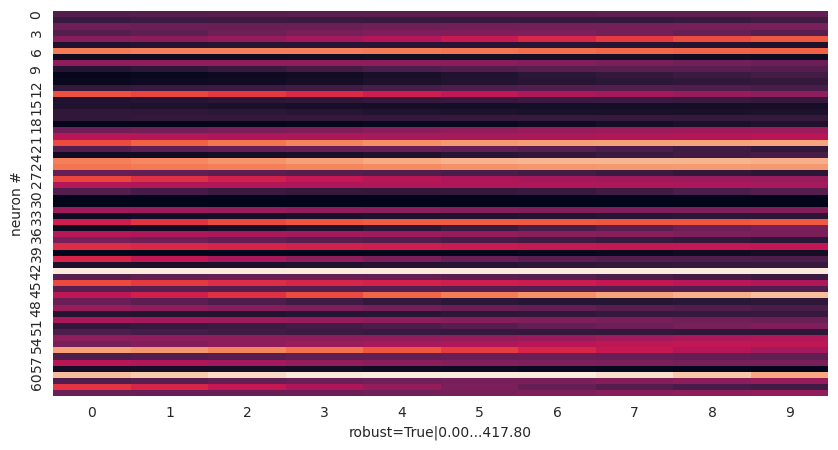

In [3]:
from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
from neuralmonkey.analyses.rsa import _rsagood_convert_PA_to_Cl

br = "PMv"
tw = (-0.1, 0)

a = DFallpa["bregion"] == br
b = DFallpa["twind"] == tw
pa = DFallpa[a & b]["pa"].values[0]

# Plot smoothed fr
pa.plotNeurHeat(0)

In [4]:
pa.Chans

[65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128]

In [83]:
from pythonlib.tools.plottools import savefig

In [84]:
import matplotlib.pyplot as plt
grouping_vars = ["shape", "gridsize"]
subtract_mean_each_level_of_var = None
plot_example_chan=65
plot_example_split_var = "shape"
DO_AGG_TRIALS = True

for donorm in [True, False]:
    if donorm:
        _, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, grouping_vars,
                                                                                      subtract_mean_each_level_of_var,
                                                                                      plot_example_chan=plot_example_chan,
                                                                                      plot_example_split_var=plot_example_split_var,
                                                                                      DO_AGG_TRIALS=DO_AGG_TRIALS)
    else:
        # don't normalize
        PAscal = pa.copy()
        PAscal = PAscal.norm_subtract_trial_mean_each_timepoint()
        PAscal = PAscal.agg_wrapper("times") # mean over time --> (chans, trials)
        PAscal, _ = PAscal.slice_and_agg_wrapper("trials", grouping_vars, return_group_dict=True)
    
    Clraw, Clsim = _rsagood_convert_PA_to_Cl(PAscal, grouping_vars, "euclidian", DO_AGG_TRIALS)
    fig, ax = Clraw.rsa_plot_heatmap(diverge=True)
    savefig(fig, f"/tmp/donorm_{donorm}.pdf")
    plt.close("all")

(<neuralmonkey.classes.population.PopAnal at 0x7f907ef04f10>,
 <Figure size 1000x800 with 6 Axes>)

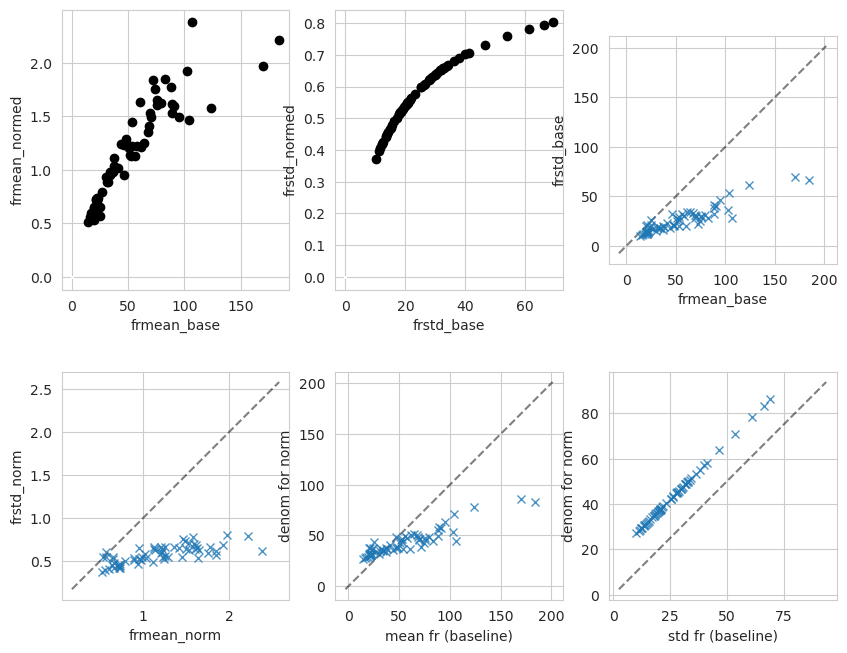

In [82]:
from neuralmonkey.analyses.state_space_good import _popanal_preprocess_normalize

_popanal_preprocess_normalize(pa, True)

In [ ]:
frmean_base

### [After loading DFallpa] DEBUGGING CLsim, etc. Compute: A single PA --> Clsim and dfrestheor

In [ ]:
# Get Clsim
# br = "PMv_m"
# tw = "dummy"
# ev = "dummy"
# wl = "dummy"

# tw = (-0.5, -0.3)
# ev = "03_samp"
# wl = "trial"

# tw = (-0.3, -0.1)
# ev = "06_on_strokeidx_0"
# wl = "trial"

br = "M1"
tw = (-0.1, 0.)
ev = "00_substrk"
wl = "substroke"

a = DFallpa["bregion"]==br
b = DFallpa["twind"]==tw
c = DFallpa["event"]==ev
d = DFallpa["which_level"]==wl
pa =DFallpa[(a & b & c & d)]["pa"].values[0]


In [ ]:
# Hand enter params
effect_vars = ["shape", "dist_angle", "index_within_stroke"]
# version_distance
# vars_test_invariance_over_dict = {"same":["index_within_stroke"], "diff":["dist_angle"]}


In [ ]:

sdir = "/tmp"
PLOT = False
# version_distance = "euclidian_unbiased"
dfres_same_diff, dfres_theor, Clraw, Clsim, PAagg, DictVarToClsimtheor = rsagood_pa_vs_theor_single(pa, effect_vars, version_distance, subtract_mean_each_level_of_var,
                                                                                                    vars_test_invariance_over_dict=vars_test_invariance_over_dict,
                                                                                                    sdir=sdir, PLOT_THEORETICAL_SIMMATS=True, PLOT=PLOT, DO_AGG_TRIALS=DO_AGG_TRIALS)

In [ ]:
dfres_theor

In [ ]:
dfres_theor

In [ ]:
print(np.sum(np.isnan(Clsim.Xinput)))
print(Clsim.Xinput.shape[0] * Clsim.Xinput.shape[1])
# Clsim.

In [ ]:
Clsim.rsa_plot_heatmap()

In [ ]:
# Given a 

In [ ]:
Cltheor = Cl

In [ ]:
# Given a mask, plot summary of it
MASKS, fig, axes = Clsim.rsa_mask_context_helper("shape", ["dist_angle", "index_within_stroke"], 
                                   "diff_specific", 
                                   ["index_within_stroke"], ["dist_angle"], PLOT=True)


In [ ]:
Cltheor, _ = Clsim.rsa_distmat_construct_theoretical("shape")
# effect_vars = ["shape", "dist_angle", "index_within_stroke"]
# version_distance
vars_test_invariance_over_dict = {"same":["index_within_stroke"], "diff":["dist_angle"]}

c_diff_context, c_same_context = Clsim.rsa_distmat_score_vs_theor(Cltheor, vars_test_invariance_over_dict, plot_and_save_mask_path="/tmp/")

In [ ]:
print("c_diff_context, c_same_context:", c_diff_context, c_same_context)

In [ ]:
print("c_diff_context, c_same_context:", c_diff_context, c_same_context)

### Other stuff with DFallpa

##### [Devo] Same minus diff

In [ ]:
# efffect
var_effect = "seqc_0_shape"
# other vars (to define "same context")
vars_context = [var for var in effect_vars if not var==var_effect]
# Invariance, test over levels of this var (or conj var).
vars_test_invariance_over_dict = {
    "same":["seqc_0_loc"],
    "diff":["event"]
}


Clsim.rsa_distmat_score_same_diff(var_effect, effect_vars, vars_test_invariance_over_dict, PLOT=False)



In [ ]:
import pandas as pd
pd.DataFrame(res)

##### [OPTIONAL] Prune PA further

In [ ]:
effect_vars = Params["question_params"]["effect_vars"]

In [ ]:
from neuralmonkey.analyses.rsa import preprocess_prune_pa_enough_data
pa, res_check_before, res_check_after, vars_remove, reason_vars_remove = preprocess_prune_pa_enough_data(pa, effect_vars)

for var in effect_vars:
    display(res_check_after[var])


In [ ]:
ma = np.isnan(Clsim.Xinput)
Clsim.rsa_matindex_plot_bool_mask(ma)

In [ ]:

# 1. Devo - unbiased eucl distance.
# 2. Use "same context" as positiv econtrol
# 3. All analyses should use "diff context" mask.

# TODO:
# DONE - put this method into Clraw (using trial-level data)
# - Test out computation of positive cnotrol
# - oput into kmain code.
# -- make sure to plot masks.
# - run it.


In [ ]:
# Compute distance 

In [ ]:
# 1) Norm by conjunction of variables (event and location)
# 2) Get correaltion after masking
# - to see effect of event, must do correlation after masking to 
# All of (diff event)
# Or just (diff event, same everything else).
# --- IE cannot have (same event, diff other things).


##### Run entire pipeline (score_wrapper) [All PA --> Summary DFRES_THEOR]

In [ ]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
# date = DATE
DictParamsEachQuestion = rsagood_questions_dict(animal, date)

# question = "CV_shape"
# question = "SP_shape_loc"
question = "SP_shape_size"
q_params = DictParamsEachQuestion[question]
print(q_params)

In [ ]:
Params

In [ ]:
question = Params["question"]
q_params = Params["question_params"]
subtract_mean_each_level_of_var = None
# vars_test_invariance_over_dict = {'same': ['seqc_0_loc'], 'diff': ['event']}
vars_test_invariance_over_dict = None

In [ ]:
vars_test_invariance_over_dict = {'same': [], 'diff': ['event']}


In [ ]:
# To reduce amount of computation, change the params
Params["version_distance"] = "euclidian"
Params["question_params"]["list_subtract_mean_each_level_of_var"] = [None]
version_distance = Params["version_distance"]


In [ ]:
# To use variables within params
question = Params["question"]
q_params = Params["question_params"]
vars_test_invariance_over_dict = q_params["list_vars_test_invariance_over_dict"][0]



In [ ]:
print(animal, date, question,version_distance, subtract_mean_each_level_of_var, vars_test_invariance_over_dict, DO_AGG_TRIALS)

In [ ]:
# To overwrite variables
subtract_mean_each_level_of_var = "seqc_0_loc"

In [ ]:
# Pick out a single case to run (Faster)

wl = "trial"
ev = "06_on_strokeidx_0"
tw = (-0.3, -0.1)

b = DFallpa["twind"]==tw
c = DFallpa["event"]==ev
d = DFallpa["which_level"]==wl
DFallpa =DFallpa[(b & c & d)].reset_index(drop=True)
assert len(DFallpa)==16 # n bregions




In [ ]:
from neuralmonkey.analyses.rsa import rsagood_score_wrapper
DFRES_THEOR, DFRES_EFFECT_MARG, DFRES_EFFECT_CONJ, DFRES_SAMEDIFF, Params = rsagood_score_wrapper(DFallpa, animal, date, question, q_params, version_distance, 
                                                                                                  subtract_mean_each_level_of_var, vars_test_invariance_over_dict, 
                                                                                                  DO_AGG_TRIALS=DO_AGG_TRIALS, PLOT_INDIV=False, do_save=False)




##### Run entire pipeline, overwriting default params (for debugging)

In [ ]:
q_params["effect_vars"] = ["seqc_0_shape"]
q_params["plot_pairwise_distmats_variables"] = ['seqc_0_shape']
version_distance = "euclidian"
subtract_mean_each_level_of_var = None
vars_test_invariance_over_dict = None

In [ ]:
from neuralmonkey.analyses.rsa import rsagood_score_wrapper

DFRES_THEOR, DFRES_EFFECT_MARG, DFRES_EFFECT_CONJ, DFRES_SAMEDIFF, Params = rsagood_score_wrapper(DFallpa, animal, date, question, q_params, version_distance, 
                                                                                                  subtract_mean_each_level_of_var, vars_test_invariance_over_dict, 
                                                                                                  DO_AGG_TRIALS=DO_AGG_TRIALS, PLOT_INDIV=False, do_save=False)




# Plot just the distance matrices and heatmaps (i.e,, dont do entire scoring) (including for cases with just one variable)

Useful if just one variable... then not possible to do scoring, but useful to visualize distance matrix

In [ ]:
# Clean up DFallpa

from neuralmonkey.analyses.rsa import preprocess_rsa_prepare_popanal_wrapper
list_pa =[]
for pa in DFallpa["pa"].tolist():
    print(pa.X.shape)
    pa, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(pa, **q_params)
    print(pa.X.shape)
    assert False
    list_pa.append(pa)
DFallpa["pa"] = list_pa


In [ ]:
res_check_effectvars["seqc_0_shape"]


In [ ]:
res_check_tasksets["seqc_0_shape"]

In [ ]:
# question_params = Params["question_params"]
# variables_plot = question_params["plot_pairwise_distmats_variables"]
# list_wl_ev_tw_plot = question_params["plot_pairwise_distmats_twinds"]

from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_plot_pairwise_distmats, rsagood_pa_vs_theor_plot_pairwise_distmats_singlevar
vars_test_invariance_over_dict_THIS = None # becuase here is looking at pairwise distmats, so would fail
version_distance = "_pearson_raw"
savedir = "/tmp"
# variables_plot = ["seqc_0_shape"]
var_effect = "seqc_0_shape"
list_wl_ev_tw_plot = [
    # ("trial", "03_samp", (0.1, 0.3)),
    # ("trial", "03_samp", (0.3, 0.5)),    
    # ("trial", "06_on_strokeidx_0", (0.3, 0.5)),    
    # ("trial", "06_on_strokeidx_0", (-0.1, 0.1)),    
    ("trial", "06_on_strokeidx_0", (0.1, 0.3)),    
]

rsagood_pa_vs_theor_plot_pairwise_distmats_singlevar(DFallpa, version_distance, savedir, var_effect,
                                           list_wl_ev_tw_plot, vars_test_invariance_over_dict_THIS,
                                           DO_AGG_TRIALS_PLOT=True)


In [ ]:
# Plot distmats with example shape drawings along the axis.

##### Quickly plot results

In [ ]:
# Plot scatter

In [ ]:
# Some derived metrics

DFRES_THEOR["score_CtxS"] = DFRES_THEOR["EffD_CtxS"] - DFRES_THEOR["EffS_CtxS"]
DFRES_THEOR["score_CtxD"] = DFRES_THEOR["EffD_CtxD"] - DFRES_THEOR["EffS_CtxD"]

DFRES_THEOR["score_ratio"] = DFRES_THEOR["score_CtxD"]/DFRES_THEOR["score_CtxS"]


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

wl = "trial"
ev = "06_on_strokeidx_0"
tw = (-0.3, -0.1)
var = "seqc_0_shape"

a = DFRES_THEOR["event"]==ev
b = DFRES_THEOR["which_level"]==wl
c = DFRES_THEOR["twind"]==tw
d = DFRES_THEOR["var"]==var
dfthis = DFRES_THEOR[(a & b & c & d)]

sns.pointplot(data=dfthis, x="bregion", y="score_ratio", col="var", kind="point", aspect=3, ax=ax)
ax.set_ylim([0, 1])

In [ ]:
if False:
    wl = "trial"
    ev = "06_on_strokeidx_0"
    tw = (-0.3, -0.1)
    
    a = DFRES_THEOR["event"]==ev
    b = DFRES_THEOR["which_level"]==wl
    c = DFRES_THEOR["twind"]==tw
    dfthis = DFRES_THEOR[(a & b & c)]
else:
    dfthis = DFRES_THEOR

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.catplot(data=dfthis, x="bregion", y="score_ratio", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)


sns.catplot(data=dfthis, x="bregion", y="score_CtxS", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)

sns.catplot(data=dfthis, x="bregion", y="score_CtxD", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(data=dfthis, x="bregion", y="EffS_CtxS", col="var", kind="point", aspect=2)
plt.axhline(0)
plt.axhline(1.5)

sns.catplot(data=dfthis, x="bregion", y="EffD_CtxS", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)

sns.catplot(data=dfthis, x="bregion", y="EffS_CtxD", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)

sns.catplot(data=dfthis, x="bregion", y="EffD_CtxD", col="var", kind="point", aspect=2);
plt.axhline(0)
plt.axhline(1.5)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(data=DFRES_THEOR, x="bregion", y="cc", col="var", kind="point", aspect=2);
plt.axhline()
sns.catplot(data=DFRES_THEOR, x="bregion", y="cc_same_context", col="var", kind="point", aspect=2);
plt.axhline()


In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_plot_results
SAVEDIR_MULT = "/tmp"
rsagood_pa_vs_theor_plot_results(DFRES_THEOR, SAVEDIR_MULT, yvar="cc_same_context")

In [ ]:
DFRES_THEOR

In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_samecontextctrl
savedir = "/tmp"
rsagood_pa_vs_theor_samecontextctrl(DFRES_THEOR, savedir)


##### [Good] rigorously testing whether activity generalizes

In [ ]:

# Two metris, get:
# - 1) rsa
# -2) modulation strength within each level.

# then do this multiple times after shuffling.
# - each shuffle, keep the correlation ebtween variables the saem, at trial level, maintaining n for each level conjucntions.



In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_wrapper

In [ ]:
subtract_mean_each_level_of_var = q_params["subtract_mean_each_level_of_var"]
version_distance = "pearson"

# 1) Get RSA


In [ ]:
# HACK
# q_params["subtract_mean_each_level_of_var"] = "gridsize"

In [ ]:
### SHUFFLE PA

##### Compute effect size of a given variable

In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_effectsize_plot_summary
rsagood_pa_effectsize_plot_summary(DFRES_THEOR, DFRES_EFFECT_MARG, DFRES_EFFECT_CONJ,
                                       Params)

##### Upper and lower bounds on "abstractness" (including shuffle)

In [ ]:
# DONE - its in the main pipeline

In [ ]:
a = dfallpa["bregion"] == "PMv_l"
b = dfallpa["twind"] == (0.1, 0.3)
pa = dfallpa[(a & b)]["pa"].values[0]


In [ ]:

# Upper bound: At trial level, for each level of var, shuffle the label for othervar (i.e., hypothesis: it doesnt matter what is othervar)
# Lower bound: At trial level, for each level of othervar, shuffle the label for var, but making sure all that were var level A are now var level B, etc. (i.e., hyp: Completely differnet enocidng of var for each level of othervar.) 
# 
# Either:
# 1. Permutation test (of above)
# 2. Bootstrap ()bn



In [ ]:
# Lower bound
# - no need to shuffle. just use (diff lev, diff lev)

In [ ]:
subtract_mean_each_level_of_var

In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_samediff_single
version_distance = "angle"
rsagood_pa_samediff_single(pa, q_params["effect_vars"], subtract_mean_each_level_of_var, DO_AGG_TRIALS=True, version_distance=version_distance, PLOT_MASKS=True)
# rsagood_pa_samediff_single(pa_shuff, effect_vars, subtract_mean_each_level_of_var, DO_AGG_TRIALS=True, PLOT_MASKS=False)

##### RUNING entire (upper and lower bounds)

In [ ]:
q_params["subtract_mean_each_level_of_var"] = None


In [ ]:
from neuralmonkey.analyses.rsa import rsagood_score_vs_shuff_wrapper
version_distance = "euclidian"
savedir = "/tmp"
rsagood_score_vs_shuff_wrapper(dfallpa, animal, DATE, question, q_params,
                          version_distance, savedir)

# OLDER STUFF BELOW

## [GOOD] SCORING RSA. (Computing dist matrix and scoring against theor matrices)

##### Method 1 - Do separately for each (wl, event, br, twind). 

In [ ]:
if False:
    ### PIG
    list_animal_date = [
            ("Pancho", "230623"),
            ("Pancho", "230626"),
            ("Diego", "230628"),
            ("Diego", "230630"),
            ]
    list_which_level = ["stroke", "stroke_off"]
    # which_level = "stroke"
    version_distance = "pearson"
    SKIP_ANALY_PLOTTING = False # if True, just collect data...
    DO_AGG_TRIALS = False # if False, then datapts are individual trials (else aggs)
elif False:
    ### CHAR
    # This is very hacky. Currently extracting DS by hand above, and then bypassing its extradction
    # belopw. SHould incorporate this input a method of DS...
    assert animal=="Pancho"
    assert DATE == 230126
    list_animal_date = [
            (animal, DATE),
            ]
    list_which_level = ["stroke", "stroke_off"]
    version_distance = "pearson"
    SKIP_ANALY_PLOTTING = False # if True, just collect data...
    DO_AGG_TRIALS = True # if False, then datapts are individual trials (else aggs)
else:
    ### SINGLKE PRIMS (trial)
    list_animal_date = [
            (animal, DATE),
            ]
    list_which_level = ["trial"]
    version_distance = "pearson"
    SKIP_ANALY_PLOTTING = False # if True, just collect data...
    DO_AGG_TRIALS = True # if False, then datapts are individual trials (else aggs)


In [ ]:
animal = "Diego"
date = 230619


In [ ]:
from neuralmonkey.analyses.rsa import rsagood_questions_params, rsagood_questions_dict
DictParamsEachQuestion = rsagood_questions_dict(animal, date)


In [ ]:
from neuralmonkey.analyses.rsa import rsagood_pa_vs_theor_wrapper

version_distance = "pearson"
subtract_mean_each_level_of_var = None
PLOT_INDIV = False
DO_AGG_TRIALS = True
DFRES_THEOR = rsagood_pa_vs_theor_wrapper(DFallpa, animal, date,
                                          DictParamsEachQuestion,
                                          version_distance,
                                          subtract_mean_each_level_of_var,
                                          PLOT_INDIV,
                                          DO_AGG_TRIALS)
#     Cltheor = DFRES_THEOR.iloc[i]["Clsim_theor"]
#     if var not in DictVarToCltheor.keys():
#         DictVarToCltheor[var] = Cltheor

##### Method 2 - Group across (wl, event, twind) in user-specific ways (e.g., compare post-stim vs. pre-stroke)

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split, dfpa_slice_specific_windows

# Compare post-stim to pre-stroke.
list_pa_get = [
    ("stroke", "00_stroke", (-0.6, -0.5)),
    ("stroke", "00_stroke", (0.4, 0.6))
]

# 1) slice
DFallpa_THIS = dfpa_slice_specific_windows(DFallpa, list_pa_get)

# 2) agg (one pa per bregion)
DFallpa_THIS = dfpa_group_and_split(DFallpa, vars_to_split=["bregion"])


##### [DEVO] Load pre-saved distance matrix

In [ ]:

from neuralmonkey.analyses.rsa import behavior_load_pairwise_strokes_distmat
distmat = behavior_load_pairwise_strokes_distmat(animal, DATE, PA, distance_ver)


In [ ]:
from neuralmonkey.analyses.rsa import _preprocess_check_which_vars_categorical
_preprocess_check_which_vars_categorical(PA, EFFECT_VARS)

In [ ]:
type()

In [ ]:
EFFECT_VARS =  q_params["effect_vars"]



In [ ]:
# for t in list_types:
import pythonlib
isinstance(t, StrokeClass)
    

In [ ]:
# exclude vars that are continuos
_preprocess_pa_check_how_much_data(PA, q_params["effect_vars"])

In [ ]:
PA, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(PA, **q_params)

res_check_effectvars[EFFECT_VARS[3]]

In [ ]:
DFRES_SAMEDIFF, DFRES_THEOR, DictBregionTwindPA_THIS, \
    DictBregionTwindClraw, DictBregionTwindClsim, savedir = _pipeline_rsa_score_pa_all(DictBregionTwindPA_THIS, q_params["effect_vars"], savedir, version_distance,
                       subtract_mean_each_level_of_var, PLOT_INDIV=False, DO_AGG_TRIALS=DO_AGG_TRIALS)


In [ ]:
SKIP_ANALY_PLOTTING

##### [OBSOLETE]

In [ ]:


# event = "03_samp"
event = "06_on_strokeidx_0"
distmat_distance_ver = None

for animal, DATE in list_animal_date:
    for which_level in list_which_level:    
        DictBregionTwindPA, EFFECT_VARS, list_twind, list_bregion = load_single_data_wrapper(animal, DATE, which_level, version_distance, event=event)
        
        # Save NOT in mult
        if DO_AGG_TRIALS:
            SAVEDIR = f"/gorilla1/analyses/recordings/main/RSA/{animal}/SPLIT_BY_QUESTIONS/{DATE}"
        else:            
            SAVEDIR = f"/gorilla1/analyses/recordings/main/RSA_trial_datapt/{animal}/SPLIT_BY_QUESTIONS/{DATE}"
        print(SAVEDIR)
        os.makedirs(SAVEDIR, exist_ok=True)
                
        ## CHeck each question --> if there's enough data..
        # Get a PA for testing
        PA = list(DictBregionTwindPA.values())[0]
        
        for q, q_params in DictParamsEachQuestion.items():
            print("=========== QUESTION: ", q)
            # Prune PA based on this question
            PAout, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(PA, **q_params)
    
            if PAout is None:
                # Summarize variables
                for k, v in res_check_tasksets.items():
                    print(k)
                    display(v)
                for var, v in res_check_effectvars.items():
                    print(var)
                    display(v)
                assert False, "Not enough data for this question!! Reduce the num variables."
            else:
                print("This question good!", q)
            
            for var, dfcheck in res_check_tasksets.items():
                print("---------------")
                print("var:", var)
                print("levels:", dfcheck["lev"].tolist())
            
        
                # Save the checks
                path = f"{SAVEDIR}/data_check_pruned-{q}-{var}.csv"
                dfcheck.to_csv(path)
            
            # save the params
            from pythonlib.tools.expttools import writeDictToYaml
            path = f"{SAVEDIR}/question_params-{q}.yaml" 
            writeDictToYaml(q_params, path)
            
        
        ##### RUN ANALYSIS FOR EVERY TASK SET
        import os
        
        subtract_mean_each_level_of_var = None
        for q, q_params in DictParamsEachQuestion.items():
            
            savedir = f"{SAVEDIR}/{which_level}/{version_distance}/{q}"
            os.makedirs(savedir, exist_ok=True)
            print(savedir)
        
            ## COLLECT ALL DATA INTO A NEW DICT. 
            DictBregionTwindPA_THIS = {}
            for (bregion, twind), PA in DictBregionTwindPA.items():
                print(bregion, twind)
                
                # Prune PA based on this question
                PA, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(PA, **q_params)
                
                # Run computations on PA
                DictBregionTwindPA_THIS[(bregion, twind)] = PA
                
            ## RUN ANALYSIS
            if SKIP_ANALY_PLOTTING:
                DFRES_SAMEDIFF, DFRES_THEOR, DictBregionTwindClraw, DictBregionTwindClsim, DictVarToClsimtheor = None, None, None, None, None
            else:
                DFRES_SAMEDIFF, DFRES_THEOR, DictBregionTwindPA_THIS, \
                    DictBregionTwindClraw, DictBregionTwindClsim, DictVarToClsimtheor, savedir = _pipeline_rsa_score_pa_all(DictBregionTwindPA_THIS, q_params["effect_vars"], savedir, version_distance,
                                       subtract_mean_each_level_of_var, PLOT_INDIV=False, DO_AGG_TRIALS=DO_AGG_TRIALS, distmat_animal=animal, distmat_date = DATE, distmat_distance_ver=distmat_distance_ver)
            
            resthis = {
                "DO_AGG_TRIALS":DO_AGG_TRIALS,
                "version_distance":version_distance,
                "which_level":which_level,
                "DFRES_SAMEDIFF":DFRES_SAMEDIFF, 
                "DFRES_THEOR":DFRES_THEOR, 
                "DictVarToClsimtheor":DictVarToClsimtheor,
                "DictBregionTwindPA":DictBregionTwindPA_THIS, 
                # "DictBregionTwindClraw":DictBregionTwindClraw, # save space, no needed
                # "DictBregionTwindClsim":DictBregionTwindClsim,
                "EFFECT_VARS":q_params["effect_vars"],
                "list_time_windows":list_twind,
                "SAVEDIR":savedir,
                "subtract_mean_each_level_of_var":subtract_mean_each_level_of_var,
                "QUESTION_PARAMS":q_params
            }
            
            # Save results temporarily
            # Around 800 MB
            import pickle
            path = f"{savedir}/resthis.pkl"
            with open(path, "wb") as f:
                pickle.dump(resthis, f)
                print("saved to: ", path)
    
        